In [ ]:
#Start by connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import dependencies
import os
import cv2
import h5py
import dlib
import math
import numpy as np
import tensorflow as tf
import pandas as pd
from pathlib import Path
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
#from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
# akses training data
#drive.mount("/content/gdrive")
directory = '/content/gdrive/MyDrive/Manuk'

In [ ]:
import pandas as pd

In [ ]:
import os

In [ ]:
class data:
    def __init__(self, path):
        self.path = path
    
    def dataframe(self):
        path_name= []
        target_name = []
        for i in os.listdir(self.path):
            for j in os.listdir(os.path.join(self.path + "/", i)):
                pic = os.path.join(self.path + "/", i + "/", j)
                path_name.append(pic)
                target_name.append(i) 
        asl = pd.DataFrame()
        asl["sound"] = path_name
        asl["target"] = target_name 
        return asl

In [ ]:
murai = data(directory)

In [ ]:
murai_data = murai.dataframe()

In [ ]:
murai_data

,sound,target
0,/content/gdrive/MyDrive/Manuk/Bagus/Ba1.mp3,Bagus
1,/content/gdrive/MyDrive/Manuk/Bagus/Ba2.mp3,Bagus
2,/content/gdrive/MyDrive/Manuk/Bagus/Ba3.mp3,Bagus
3,/content/gdrive/MyDrive/Manuk/Bagus/Ba4.mp3,Bagus
4,/content/gdrive/MyDrive/Manuk/Bagus/Ba5.mp3,Bagus
5,/content/gdrive/MyDrive/Manuk/Bagus/Ba6.mp3,Bagus
6,/content/gdrive/MyDrive/Manuk/Bagus/Ba7.mp3,Bagus
7,/content/gdrive/MyDrive/Manuk/Bagus/Ba8.mp3,Bagus
8,/content/gdrive/MyDrive/Manuk/Bagus/Ba9.mp3,Bagus
9,/content/gdrive/MyDrive/Manuk/Bagus/Ba10.mp3,Bagus


In [ ]:
murai_data.target.unique()

array(['Bagus', 'Biasa'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


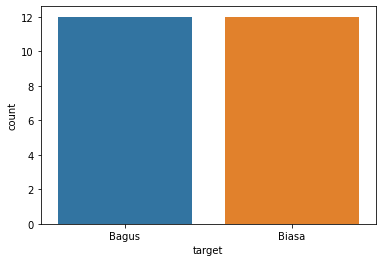

In [ ]:
import seaborn as sns
sns.countplot(murai_data.target)

In [ ]:
import numpy as np

In [ ]:
unique, count = np.unique(murai_data.target, return_counts =True)
target_unique = {k:v for (k,v) in zip(unique, count)}
target_unique

{'Bagus': 12, 'Biasa': 12}

## preprocessing

In [ ]:
import glob
import librosa
import librosa.display

In [ ]:
import struct

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

In [ ]:
wavfilehelper = WavFileHelper()

audiodata = []
for index, row in murai_data.iterrows():
    
    file_name = row['sound']
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [ ]:
audiodf

,num_channels,sample_rate,bit_depth
0,80,1886928700,25954
1,80,1886928700,25954
2,80,1886928700,25954
3,80,1886928700,25954
4,80,1886928700,25954
5,80,1886928700,25954
6,80,1886928700,25954
7,80,1886928700,25954
8,80,1886928700,25954
9,80,1886928700,25954


In [ ]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

In [ ]:
murai_data.sound[0]

'/content/gdrive/MyDrive/Manuk/Bagus/Ba1.mp3'

In [ ]:
extract_features(murai_data.sound[10])

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


array([-166.34642   ,    1.3136122 ,  -65.75676   ,   50.90616   ,
         -0.8764656 ,   14.79018   ,  -36.55962   ,   11.18795   ,
        -10.765559  ,   12.371364  ,  -14.7547245 ,  -12.460459  ,
        -11.705657  ,   16.239044  ,  -22.33609   ,   -2.9580374 ,
          0.5048756 ,   13.791037  ,  -17.796085  ,    6.9766583 ,
         -0.37322783,   -6.2661357 ,   -9.05901   ,   -2.48803   ,
         -5.41554   ,    0.89878726,   -4.690887  ,   -4.838975  ,
         -1.0872003 ,    2.9900174 ,   -7.3149147 ,   -2.758997  ,
          1.149221  ,   -1.7797022 ,    0.27465588,   -1.5589855 ,
         -1.9978175 ,    2.439982  ,    1.8009502 ,   -4.487055  ],
      dtype=float32)

In [ ]:
features = []
for index, row in murai_data.iterrows():
    
    file_name = row['sound']
    class_label = row["target"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

Finished feature extraction from  24  files


In [ ]:
featuresdf

,feature,class_label
0,"[-187.88477, 44.13798, -54.129726, 41.633205, ...",Bagus
1,"[-192.4626, 1.9574467, -52.57142, 47.083733, -...",Bagus
2,"[-213.42674, 22.90789, -45.894737, 16.328354, ...",Bagus
3,"[-181.82391, 12.879874, -50.70747, 69.870094, ...",Bagus
4,"[-156.2501, 9.570025, -80.8352, 77.34861, 6.63...",Bagus
5,"[-218.62941, 21.54761, -44.80174, 17.571419, 7...",Bagus
6,"[-173.94276, -2.613589, -57.038826, 53.78522, ...",Bagus
7,"[-198.5053, -9.341432, -55.25323, 67.56275, -1...",Bagus
8,"[-235.80064, 6.3009768, -99.96067, -2.1391428,...",Bagus
9,"[-162.49442, 40.94901, -66.75569, 37.077366, -...",Bagus


## ANN

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

In [ ]:
X.shape

(24, 40)

In [ ]:
num_rows = 40
num_columns = 1
num_channels = 1

X_train = X.reshape(X.shape[0], num_rows, num_channels)

In [ ]:
X_train.shape

(24, 40, 1)

In [ ]:
yy

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics 

num_rows = 40
num_columns = 1
num_channels = 1

X_train = X.reshape(X.shape[0], num_rows, num_channels)

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('sigmoid'))

In [ ]:

# Compile the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [ ]:
# Calculate training accuracy 
history = model.fit(X, yy, batch_size=2, epochs=50, verbose=1)

Epoch 1/50
12/12 [==============================] - 1s 3ms/step - loss: 13.0995 - accuracy: 0.3750
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 15.3272 - accuracy: 0.3333
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 8.4729 - accuracy: 0.4583
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 6.0713 - accuracy: 0.6667
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 6.1080 - accuracy: 0.6667
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 6.0289 - accuracy: 0.7083
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 6.7205 - accuracy: 0.5000
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 5.8941 - accuracy: 0.6667
Epoch 9/50
12/12 [==============================] - 0s 3ms/step - loss: 7.1390 - accuracy: 0.7500
Epoch 10/50
12/12 [==============================] - 0s 2ms/step - loss: 3.7248 - accuracy: 0.7083
Epoch 11/50
12/12

In [ ]:
featuresdf.feature[0].reshape(-1,40)

array([[-1.8788477e+02,  4.4137981e+01, -5.4129726e+01,  4.1633205e+01,
        -5.4501314e+00,  1.3422079e+01,  1.7301735e+00,  2.2326014e+01,
        -5.1597085e+00,  7.1470184e+00, -9.8827658e+00,  4.6512403e+00,
         1.7910190e+00,  2.8090107e+00, -4.0713367e+00,  3.3324268e+00,
        -1.0795351e+01,  9.6913493e-01, -6.6605177e+00,  2.8555791e+00,
        -5.2677679e+00, -2.4492791e+00, -5.5219221e+00, -3.5378143e-01,
        -7.6724319e+00,  1.9910520e-02, -3.2260339e+00, -1.6746795e+00,
        -4.7172403e+00, -5.7667053e-01, -5.5358386e+00, -2.4095595e+00,
        -2.5306201e+00, -3.8499945e-01, -4.5476830e-01, -1.0226182e+00,
        -2.0971730e+00,  1.3804582e+00,  3.4105716e+00, -1.5160639e+00]],
      dtype=float32)

In [ ]:
result = model.predict(X)

1/1 [==============================] - 0s 60ms/step


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Menampilkan nilai error selama pelatihan
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
45,1.641173,0.791667,45
46,0.992275,0.833333,46
47,0.238282,0.958333,47
48,1.291279,0.708333,48
49,0.432741,0.875000,49


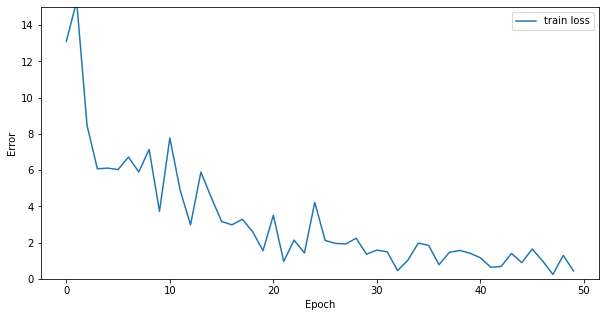

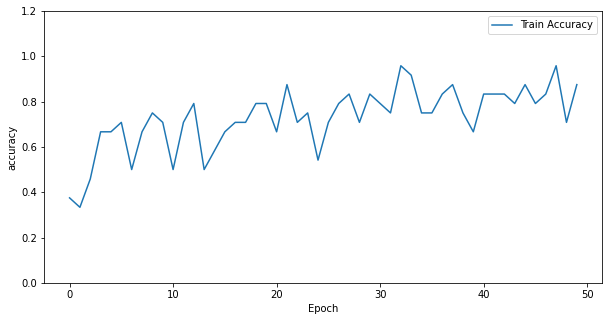

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(10,5))  
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.plot(hist['epoch'], hist['loss'],
           label='train loss')
  plt.ylim([0,15])
  plt.legend()

  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
  plt.ylim([0,1.2])
  plt.legend()
  
plt.show()
plot_history(history)

In [ ]:
result

array([[5.8922052e-01, 4.4482198e-01],
       [9.9903947e-01, 1.2838922e-04],
       [9.7932905e-01, 7.4467971e-03],
       [9.9996716e-01, 7.4224131e-06],
       [9.9989527e-01, 1.5558193e-05],
       [7.8429806e-01, 1.4608310e-01],
       [9.9999154e-01, 1.6643027e-06],
       [9.9996215e-01, 4.3370064e-06],
       [9.0872042e-04, 9.9821442e-01],
       [8.2866502e-01, 2.7722874e-01],
       [9.9999261e-01, 1.5958560e-06],
       [9.9985409e-01, 1.5253085e-05],
       [6.3280331e-04, 9.7274619e-01],
       [1.3329687e-03, 9.9706966e-01],
       [3.7785926e-01, 7.8046942e-01],
       [6.7019355e-05, 9.9940366e-01],
       [9.9095574e-04, 9.9670810e-01],
       [8.8857356e-03, 9.9198753e-01],
       [1.2802500e-02, 9.9009556e-01],
       [6.8291244e-03, 9.9017173e-01],
       [6.6831330e-05, 9.9975383e-01],
       [3.0429315e-04, 9.7885716e-01],
       [3.9133665e-04, 9.9917805e-01],
       [4.1286164e-04, 9.9927694e-01]], dtype=float32)

In [ ]:
hasil = []
for i in result:
  if i.max()/(i[0]+i[1]) == i[0]/(i[0]+i[1]):
    hasil.append('Bagus')
    print('Bagus')
  else:
    hasil.append('Biasa')
    print('Biasa')

Bagus
Bagus
Bagus
Bagus
Bagus
Bagus
Bagus
Bagus
Biasa
Bagus
Bagus
Bagus
Biasa
Biasa
Biasa
Biasa
Biasa
Biasa
Biasa
Biasa
Biasa
Biasa
Biasa
Biasa


In [ ]:
np.array(hasil)

array(['Bagus', 'Bagus', 'Bagus', 'Bagus', 'Bagus', 'Bagus', 'Bagus',
       'Bagus', 'Biasa', 'Bagus', 'Bagus', 'Bagus', 'Biasa', 'Biasa',
       'Biasa', 'Biasa', 'Biasa', 'Biasa', 'Biasa', 'Biasa', 'Biasa',
       'Biasa', 'Biasa', 'Biasa'], dtype='<U5')

In [ ]:
np.array(murai_data.target)

array(['Bagus', 'Bagus', 'Bagus', 'Bagus', 'Bagus', 'Bagus', 'Bagus',
       'Bagus', 'Bagus', 'Bagus', 'Bagus', 'Bagus', 'Biasa', 'Biasa',
       'Biasa', 'Biasa', 'Biasa', 'Biasa', 'Biasa', 'Biasa', 'Biasa',
       'Biasa', 'Biasa', 'Biasa'], dtype=object)

In [ ]:
!wget https://raw.githubusercontent.com/ekodavidkurnia/AI-Assistant-Lecturer-2021/master/helper_functions.py

--2022-10-28 14:20:56--  https://raw.githubusercontent.com/ekodavidkurnia/AI-Assistant-Lecturer-2021/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-10-28 14:20:57 (85.6 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
# Import helper functions we're going to use
from helper_functions import make_confusion_matrix

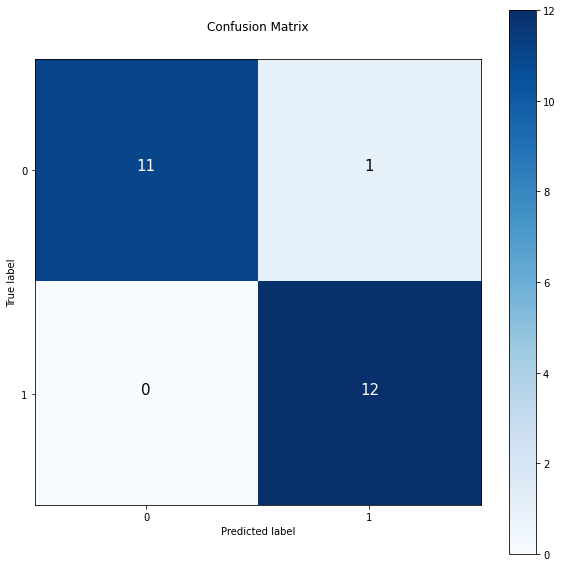

In [ ]:
make_confusion_matrix(y_true=np.array(murai_data.target),
                      y_pred=np.array(hasil))

## Random Forest

In [ ]:
np.array(featuresdf.feature.tolist()).shape

(24, 40)

In [ ]:
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
labels_encoded = le.transform(y)

In [ ]:
labels_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(X, labels_encoded)

RandomForestClassifier()

In [ ]:
RF_model.score(X, labels_encoded)

1.0

In [ ]:
prediction_RF = RF_model.predict(X)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [ ]:
y

array(['Bagus', 'Bagus', 'Bagus', 'Bagus', 'Bagus', 'Bagus', 'Bagus',
       'Bagus', 'Bagus', 'Bagus', 'Bagus', 'Bagus', 'Biasa', 'Biasa',
       'Biasa', 'Biasa', 'Biasa', 'Biasa', 'Biasa', 'Biasa', 'Biasa',
       'Biasa', 'Biasa', 'Biasa'], dtype='<U5')

In [ ]:
prediction_RF

array(['Bagus', 'Bagus', 'Bagus', 'Bagus', 'Bagus', 'Bagus', 'Bagus',
       'Bagus', 'Bagus', 'Bagus', 'Bagus', 'Bagus', 'Biasa', 'Biasa',
       'Biasa', 'Biasa', 'Biasa', 'Biasa', 'Biasa', 'Biasa', 'Biasa',
       'Biasa', 'Biasa', 'Biasa'], dtype='<U5')

In [ ]:
cm = confusion_matrix(y, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

NameError: ignored

In [ ]:
make_confusion_matrix(y_true=y,
                      y_pred=prediction_RF)

# Prediksi Data baru

In [ ]:
lokasi_data = '/content/gdrive/MyDrive/Random/Ba1.mp3'

In [ ]:
coba_data = extract_features(lokasi_data)

In [ ]:
coba_data = np.array(coba_data)

In [ ]:
hasil_coba = RF_model.predict(coba_data.reshape(1, 40))
#Inverse le transform to get original label back. 
hasil_coba = le.inverse_transform(hasil_coba)

In [ ]:
hasil_coba

**Validasi ML**

In [ ]:
path = '/content/gdrive/MyDrive/Validasi/Bagus'

In [ ]:
sound = []
for i in os.listdir(path):
  pic = os.path.join(path + "/", i )
  sound.append(pic)

newData = pd.DataFrame()
newData["sound"] = sound
newData

In [ ]:
features = []
for index, row in newData.iterrows():
    
    file_name = row['sound']
    data = extract_features(file_name)
    
    features.append(data)

In [ ]:
data_baru = RF_model.predict(np.array(features))
#Inverse le transform to get original label back. 
data_baru = le.inverse_transform(data_baru)

In [ ]:
data_baru[:5]

In [ ]:
ax = sns.countplot(data_baru[:5])
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.title("Hasil Prediksi 5 Data Baru") # You can comment this line out if you don't need title
plt.show(ax)

In [ ]:
path = '/content/gdrive/MyDrive/Validasi/Biasa'

In [ ]:
sound = []
for i in os.listdir(path):
  pic = os.path.join(path + "/", i )
  sound.append(pic)

newData = pd.DataFrame()
newData["sound"] = sound
newData

In [ ]:
features = []
for index, row in newData.iterrows():
    
    file_name = row['sound']
    data = extract_features(file_name)
    
    features.append(data)

In [ ]:
data_baru = RF_model.predict(np.array(features))
#Inverse le transform to get original label back. 
data_baru = le.inverse_transform(data_baru)

In [ ]:
data_baru[:5]

In [ ]:
ax = sns.countplot(data_baru[:5])
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.title("Hasil Prediksi 5 Data Baru") # You can comment this line out if you don't need title
plt.show(ax)

## prediksi semua

In [ ]:
path = '/content/gdrive/MyDrive/Random'

In [ ]:
sound = []
for i in os.listdir(path):
  pic = os.path.join(path + "/", i )
  sound.append(pic)

newData = pd.DataFrame()
newData["sound"] = sound
newData

In [ ]:
features = []
for index, row in newData.iterrows():
    
    file_name = row['sound']
    data = extract_features(file_name)
    
    features.append(data)

In [ ]:
data_baru = RF_model.predict(np.array(features))
#Inverse le transform to get original label back. 
data_baru = le.inverse_transform(data_baru)

In [ ]:
data_baru[:20]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ax = sns.countplot(data_baru[:20])
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.title("Hasil Prediksi 5 Data Baru") # You can comment this line out if you don't need title
plt.show(ax)